# Homework Starter — Stage 10b: Time Series & Classification
Fill in the TODOs. Use your own dataset or adapt the synthetic generator below.

In [1]:
# Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, TimeSeriesSplit
np.random.seed(7); sns.set(); plt.rcParams['figure.figsize']=(9,4)

## Option A: Use Your Own Data (Recommended)
Load your data here (ensure a DateTime index for time series).

In [2]:
# TODO: load your data
# df = pd.read_csv('path/to.csv', parse_dates=['Date'], index_col='Date')
RAW = "../data/raw/sample_data.csv"
df = pd.read_csv(RAW)


df['Date'] = pd.date_range("2021-01-01", periods=len(df), freq="D")
df = df.set_index("Date")


series = df['spend'].copy()


series = series.fillna(method='ffill').fillna(0)

df['spend'] = series

df['ret'] = df['spend'].pct_change().fillna(0.0)


/var/folders/_m/3bq8lfhn2ql486bmdjw4n7br0000gn/T/ipykernel_87869/1784856334.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.fillna(method='ffill').fillna(0)


## Feature Engineering

In [3]:
# TODO: create at least two features
df['lag_1'] = df['ret'].shift(1)
df['roll_mean_5'] = df['ret'].rolling(5).mean().shift(1)
df['roll_std_10'] = df['ret'].rolling(10).std().shift(1)

# Target: next-step return & up/down
df['y_next_ret'] = df['ret'].shift(-1)
df['y_up'] = (df['y_next_ret']>0).astype(int)

df_feat = df.dropna().copy()

## Split

In [4]:
# Time-aware split
cut=int(len(df_feat)*0.8)
train, test = df_feat.iloc[:cut], df_feat.iloc[cut:]
features=['lag_1','roll_mean_5','roll_std_10']

X_tr, X_te = train[features], test[features]
y_tr_reg, y_te_reg = train['y_next_ret'], test['y_next_ret']
y_tr_clf, y_te_clf = train['y_up'], test['y_up']


## Pipeline + Model (Choose one track below)

Regression MAE=0.50228, RMSE=0.45162


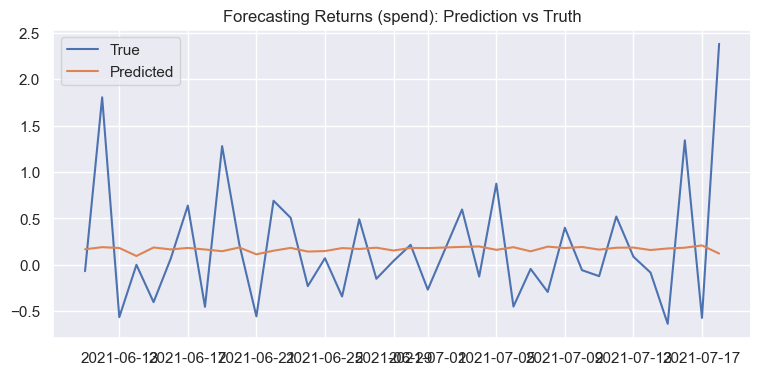

In [5]:
# Track 1: Forecasting returns
reg = Pipeline([('scaler', StandardScaler()), ('linreg', LinearRegression())])
reg.fit(X_tr, y_tr_reg)
pred_reg = reg.predict(X_te)

mae = mean_absolute_error(y_te_reg, pred_reg)
rmse = mean_squared_error(y_te_reg, pred_reg)
print(f'Regression MAE={mae:.5f}, RMSE={rmse:.5f}')
plt.plot(y_te_reg.index, y_te_reg, label='True')
plt.plot(y_te_reg.index, pred_reg, label='Predicted')
plt.legend(); plt.title("Forecasting Returns (spend): Prediction vs Truth"); plt.show()

              precision    recall  f1-score   support

           0      0.514     1.000     0.679        19
           1      0.000     0.000     0.000        18

    accuracy                          0.514        37
   macro avg      0.257     0.500     0.339        37
weighted avg      0.264     0.514     0.348        37



/Users/xujunyang/miniconda3/envs/finance/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/xujunyang/miniconda3/envs/finance/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/xujunyang/miniconda3/envs/finance/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

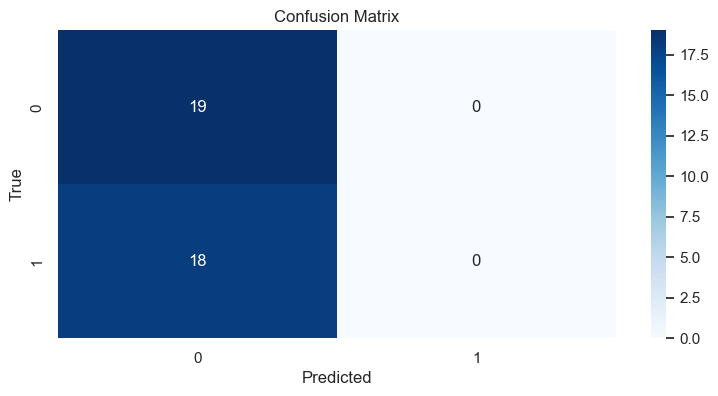

In [6]:
# Track 2: Classification (up/down)
clf = Pipeline([('scaler', StandardScaler()), ('logit', LogisticRegression(max_iter=1000))])
clf.fit(X_tr, y_tr_clf)
pred_clf = clf.predict(X_te)

print(classification_report(y_te_clf, pred_clf, digits=3))

cm = confusion_matrix(y_te_clf, pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()



In [7]:
OUT = "../data/processed/sample_data_timeseries.csv"
df_feat.to_csv(OUT, index=True)
print(f"Processed dataset saved to {OUT}")

Processed dataset saved to ../data/processed/sample_data_timeseries.csv


## Interpretation (Markdown)
- What worked?
- Where might assumptions fail?
- How would you extend features or model?

### Save Notebook
Remember to save as `notebooks/modeling_<team>.ipynb`.

## Stage10b — Time Series & Classification (using own dataset)

**Steps:**
1. Load `data/raw/sample_data.csv` and set up a DateTime index.
2. Handle missing values (`ffill` + `fillna(0)`).
3. Compute returns based on `spend` column.
4. Engineer features: `lag_1`, `roll_mean_5`, `roll_std_10`.
5. Create targets:
   - `y_next_ret` (for regression forecast).
   - `y_up` (binary up/down for classification).
6. Use a time-aware 80/20 split.
7. Train both:
   - **Regression pipeline** → Linear Regression, RMSE & MAE metrics, prediction vs truth plot.
   - **Classification pipeline** → Logistic Regression, classification report & confusion matrix.
8. Save the processed dataset to `data/processed/sample_data_timeseries.csv`.

**Run method:**
- Open `notebooks/stage10b_timeseries.ipynb`.
- Run all cells.
- Check outputs in notebook and processed dataset in `data/processed/`.
